# Resolvendo Problemas de Engenharia de Bioprocessos e Biotecnologia em *Python*
---


## Equações diferenciais

Uma derivada é definida por:


$\frac{dy}{dx} =
  f'_{(x)} =
  \displaystyle \lim_{h \to 0} \frac{f_{(x+h)}- f_{(x)}}{h}$ (Equação 1)


A partir desta definição, uma equação diferencial ordinária (EDO) genérica é dada por:


$F_{( x, y, \frac{dy}{dx}, \frac{d^2y}{dx^2}, ⋯, \frac{d^ny}{dx^n})} = 0$ (Equação 2)


Portanto, uma EDO é definida por uma equação contendo funções diferenciais aplicadas à variável dependente ($y$) em relação a uma única variável independente ($x$).


Para resolver uma EDO através de métodos numéricos, é necessário definir condições iniciais ou de contorno, um intervalo sobre o qual a equação será calculada.

Tais métodos numéricos são iterativos e cada iteração é aplicada sobre valores espaçados entre si em distâncias chamadas de "passos", representados por $h$.

Quanto menor o passo, maior o número de iterações dentro do intervalo, e portanto, menor o erro contido na solução fornecida pelo método.


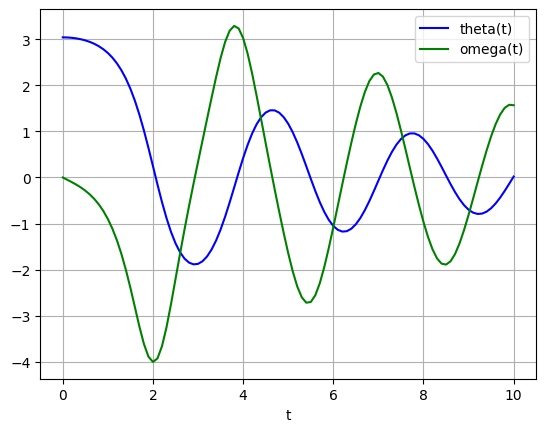

In [ ]:
##### Exemplo do uso da biblioteca SciPy para resolução de sistemas de EDOs #####

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def pendulo (y, t, b, c):
  theta, omega = y
  dydt = [omega, -b*omega - c*np.sin(theta)]
  return dydt

b = 0.25
c = 5.00

# x = t (tempo)
# y = [theta, omega] (posição e velocidade)
# Pendulo quase na vertical (pi-0.1) e em descanso
y0 = [np.pi - 0.1, 0.0]
t = np.linspace(0, 10, 101)

solucao = odeint(pendulo, y0, t, args=(b, c))

plt.plot(t, solucao[:, 0], 'b', label='theta(t)')
plt.plot(t, solucao[:, 1], 'g', label='omega(t)')
plt.legend()
plt.xlabel('t')
plt.grid()
plt.show()


---
# Exemplo de Aplicação

Em bioprocessos nos quais é necessário sintetizar um produto e/ou produzir biomassa, deve-se acompanhar o progresso do crescimento celular, do consumo de substrato fornecido e da síntese do produto de interesse. Um dos modelos mais empregados para a simulação e acompanhamento desses processos é aquele proposto por Monod, um homólogo da equação de Michaelis-Menten, também amplamente conhecido por engenheiros de bioprocessos.


De acordo com o modelo de Monod, a taxa de crescimento específica de uma cultura celular é dada por:


$\mu = \frac{1}{X} \cdot \frac{dX}{dt} = \frac{\mu_{máx} \cdot S}{K_S + S}$
(Equação 1)


Onde:

- $\mu$ é a taxa de crescimento específica;
- $\mu_{máx}$ é a taxa máxima de crescimento observada no cultivo, ou seja, o valor máximo de $\mu$;
- $t$ é o tempo de cultivo, dado em $h$;
- $K_S$ é a constante de saturação, no ponto em que $\mu = \mu_{máx}/2$, dada em $g/L$;
- $S$ é a concentração de substrato, em $g/L$.


São, portanto, necessários três diferentes balanços de massa para avaliar as concentrações de célula, substrato e produto no meio, dependentes umas das outras e do tempo decorrido de cultivo. O modelo de Luedeking e Piret, baseado na cinética de crescimento de Monod, fornecem as relações necessárias para estes balanços.


1. Balanço de massa de células:

  Taxa de crescimento atual = Concentração celular *x* (Taxa de crescimento específica - Taxa de morte celular)

  $\frac{dX}{dt} = X \cdot (\mu - V)$
  (Equação 2)

  Onde:
  - $V$ é o volume atual de meio no reator, dado por $V_0 + Qt$;
    - $V_0$ é o volume inicial de preenchimento do reator;
    - $Q$ é a vazão de alimentação.


2. Balanço de massa de substrato:

  Taxa de consumo de substrato = Substrato fornecido - Substrato consumido

  $\frac{dS}{dt} = V \cdot (S_0 - S) - \frac{X \cdot \mu}{Y_{XS}}$
  (Equação 3)

  Onde:
  - $S_0$ é a concentração de substrato na alimentação do reator;
  - $Y_{XS}$ é o coeficiente estequiométrico, isto é uma constante que indica o fator de conversão de substrato em biomassa, dado por $g_{células}/ g_{substrato}$.


3. Balanço de massa de produto:

  Taxa de formação de produto = Produto inicial - Produto consumido ou drenado + Produto sintetizado

  $\frac{dP}{dt} = V \cdot (P_0 - P) + X \cdot (\alpha \cdot \mu + \beta)$
  (Equação 4)

  Onde:
  - $P_0$ é a concentração de produto na alimentação do reator;
  - $\alpha$ e $\beta$ são as constantes de Luedeking e Piret, respectivamente, associada e não associada ao crescimento do microrganismo.


Com base nas equações 1 a 4, é possível analisar os parâmetros descritos em um cultivo e/ou processo fermentativo.

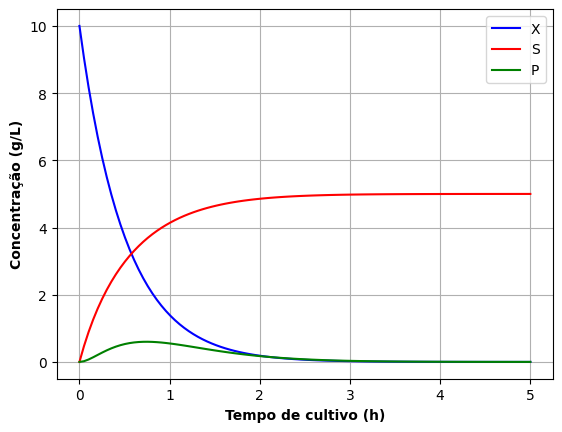

In [ ]:
########## EXEMPLO DE PROCESSO FERMENTATIVO ##########

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#--------------------------------------------------------#
#|               Definicao das constantes               |#
#--------------------------------------------------------#
mimax = 0.4
Ks = 10
t0 = 0
tf = 5
X0 = 10
S0 = 0
Si = 5
P0 = 0
Pi = 0
V0 = 2
Q = 0.1
Yxs = 0.5
alfa = 5
beta = 0

#--------------------------------------------------------#
#|                 Declaracao da Funcao                 |#
#--------------------------------------------------------#

def crescimento (Concentracoes, t):
  X, S, P = Concentracoes
  mi = mimax * S/ (Ks + S)
  V = V0 + Q * t
  dXdt = X * (mi - V)
  dSdt = V * (Si - S) - X * mi/ Yxs
  dPdt = V * (Pi - P) + X * (alfa * mi + beta)
  return dXdt, dSdt, dPdt

#--------------------------------------------------------#
#|                  Integracao Numerica                 |#
#--------------------------------------------------------#

iniciais = [X0, S0, P0]
t = np.linspace(t0, tf, 100)
Solucao = odeint(crescimento, iniciais, t)

#Separacao dos vetores solucao
X = Solucao[:, 0]
S = Solucao[:, 1]
P = Solucao[:, 2]

#--------------------------------------------------------#
#|                  Plotagem do Grafico                 |#
#--------------------------------------------------------#

plt.plot(t, X, "b-", label="X")
plt.plot(t, S, "r-", label="S")
plt.plot(t, P, "g-", label="P")
plt.xlabel("Tempo de cultivo (h)", weight="bold")
plt.ylabel("Concentração (g/L)", weight="bold")
plt.legend(loc="best")
plt.grid(True)
plt.show()

